In [83]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as mplt
import seaborn as sns

In [107]:
R = 8.31446
F: float = 96485.33  # Faraday's constant        C mol-1
k = 1.38e-23  # Boltzmann constant        J K-1
q = 1.602176620898e-19  # elementary charge         C
Na = 6.022e23  # Avogadro's constant       mol-1

T = 37 + 273.15
RTF = R * T / F

## Excitatory synaptic current

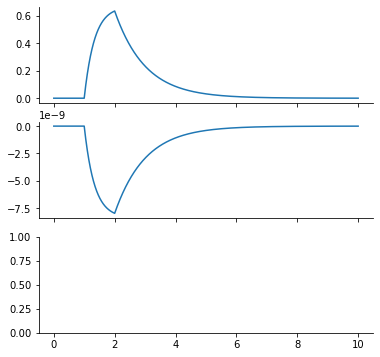

In [113]:
vm = -72.6*1e-3
ena= -60*1e-3


alpha = 2e6 # ms-1.mM-1 --> s-1.M-1= Forward rate constant
beta = 1e3  # ms-1 --> s-1 == Backward rate constant



total_t = 10e-3 #s
dt = 1e-6 #s
start_t = 1e-3
end_t  = 2e-3

g_synapse = 1e-9

r_initial = 0 # proportion of bound receptors at the beginning
r= r_initial
t=0
t_arr =[]
r_arr =[]
vm_arr = []
i_arr = []
i = 0

while t<total_t:

    if t >=start_t and t<=end_t:
        nt_conc = 1e-3
    else: nt_conc = 0
        
    d_r = (alpha*nt_conc*(1-r)-beta*r)*dt
    r = r + (d_r)
    #r = r_infinity + (r_initial)* np.exp(-(t) / tau)
    r_arr.append(r)
    
    
    i  = g_synapse*r*(vm-ena)
    i_arr.append(i)
    
    
    
    t_arr.append(t*1e3)
    t=t+dt


f_ex, (ax_1,ax_2,ax_3) = mplt.subplots(3,1, figsize=(6,6), sharex=True)
ax_1.plot(t_arr, r_arr)
ax_2.plot(t_arr, i_arr)

#mplt.
sns.despine()

## Inhibitory synaptic current

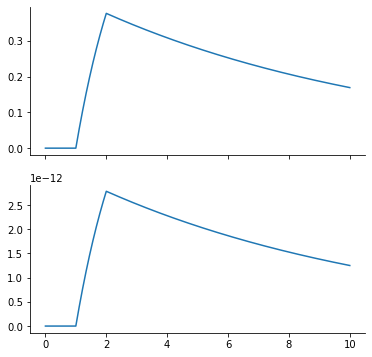

In [115]:
vm = -72.6*1e-3
ecl= -80*1e-3


alpha = 0.5e6 # ms-1.mM-1 --> s-1.M-1= Forward rate constant
beta = 0.1e3  # ms-1 --> s-1 == Backward rate constant

total_t = 10e-3 #s
dt = 1e-6 #s
start_t = 1e-3
end_t  = 2e-3

r_initial = 0 # proportion of bound receptors at the beginning
r= r_initial
t=0
t_arr =[]
r_arr =[]

i_arr = []
i = 0

while t<total_t:

    if t >=start_t and t<=end_t:
        nt_conc = 1e-3
    else: nt_conc = 0
        
    d_r = (alpha*nt_conc*(1-r)-beta*r)*dt
    r = r + (d_r)
    #r = r_infinity + (r_initial)* np.exp(-(t) / tau)
    r_arr.append(r)
    
    i  = g_synapse*r*(vm-ecl)
    i_arr.append(i)
    
    
    t_arr.append(t*1e3)
    t=t+dt

f_in, (ax_1,ax_2) = mplt.subplots(2,1, figsize=(6,6), sharex=True)
ax_1.plot(t_arr, r_arr)
ax_2.plot(t_arr, i_arr)
#mplt.
sns.despine()